# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

np.random.seed(45)

def generate_data(size=100):

    class_1 = np.random.randn(size, 2) + np.array([-2, -2])  
    class_2 = np.random.randn(size, 2) + np.array([2, 2])    
    X = np.vstack((class_1, class_2))
    y = np.array([0]*size + [1]*size)
    return X, y

def plot_data(X, y):
    """отображение данных с цветовой маркировкой классов."""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title('Исходные данные (два линейно разделимых класса)')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()



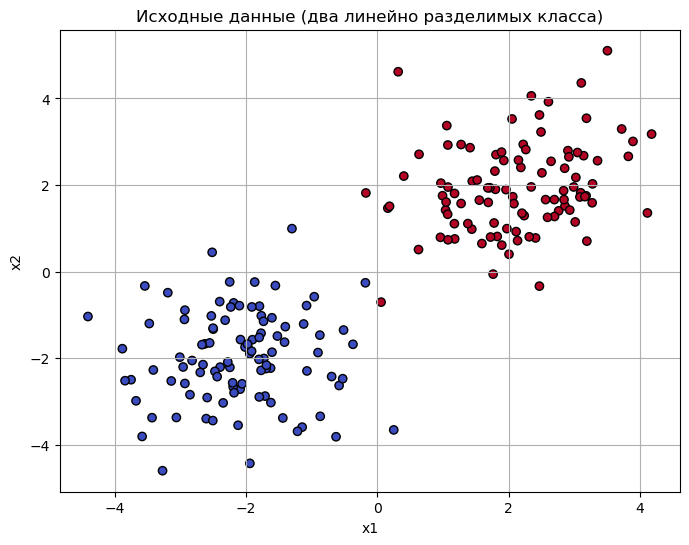

In [3]:
SIZE = 100
X, y = generate_data(SIZE)
plot_data(X, y)

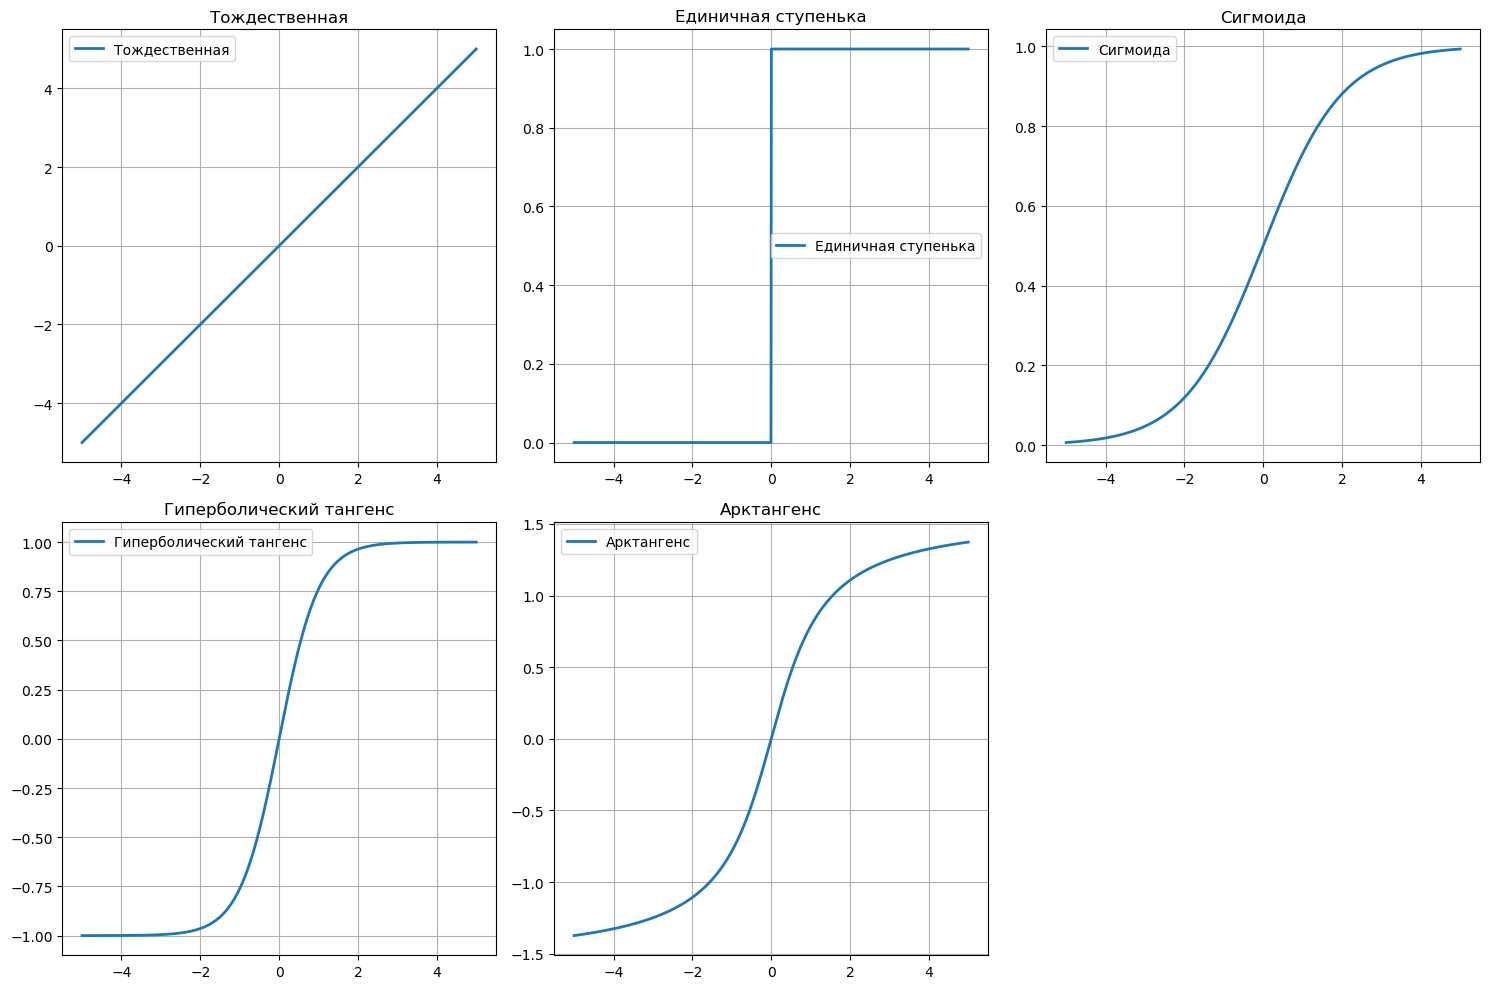

In [4]:
def identity(x):
    return x

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def arctg(x):
    return np.arctan(x)

def plot_activation_functions():
    x = np.linspace(-5, 5, 1000)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    functions = [
        (identity, "Тождественная"),
        (step_function, "Единичная ступенька"),
        (sigmoid, "Сигмоида"),
        (tanh, "Гиперболический тангенс"),
        (arctg, "Арктангенс")
    ]
    
    for i, (func, name) in enumerate(functions):
        y = func(x)
        axes[i].plot(x, y, linewidth=2, label=name)
        axes[i].set_title(name)
        axes[i].grid(True)
        axes[i].legend()

    axes[-1].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_activation_functions()

In [5]:
class Perceptron:
    
    def __init__(self, n_inputs, activation_func=sigmoid):

        self.weights = np.random.randn(n_inputs)
        self.bias = 0.0
        self.activation_func = activation_func
    
    def predict(self, X):

        z = np.dot(X, self.weights) + self.bias
        return self.activation_func(z)
    
    def predict_class(self, X):

        outputs = self.predict(X)

        if self.activation_func == step_function:
            return outputs.astype(int)
        else:
            return (outputs > 0.5).astype(int)
    
    def train(self, X, y, learning_rate=0.1, epochs=10):

        losses = []
        
        for epoch in range(epochs):
            for i in range(len(X)):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation_func(z)
                
                if self.activation_func == step_function:
                    y_pred_binary = y_pred
                else:
                    y_pred_binary = 1 if y_pred > 0.5 else 0
                
                error = y[i] - y_pred_binary
                self.weights += learning_rate * error * X[i]
                self.bias += learning_rate * error
            

            preds = self.predict_class(X)
            acc = (preds == y).mean()
            losses.append(1 - acc)  
            
            print(f"Эпоха {epoch+1}/{epochs} — точность: {acc:.4f}")
        
        return losses

def neuron_step(x, w, b):
    return 1 if sum(x[i] * w[i] for i in range(len(x))) + b > 0 else 0

w_test = [0.5, -0.3]
b_test = 0.1
x_test = [1.0, 2.0]
print(f"Выход нейрона (ступенька): {neuron_step(x_test, w_test, b_test)}")

Выход нейрона (ступенька): 1


Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9900
Эпоха 5/10 — точность: 0.9950
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9950
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


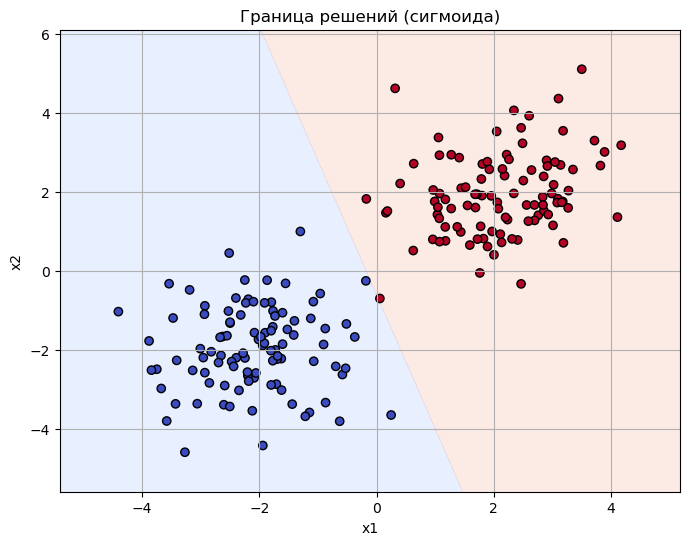

In [6]:
def plot_decision_boundary(perceptron, X, y, title="Граница решений"):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

perceptron_sigmoid = Perceptron(n_inputs=2, activation_func=sigmoid)
perceptron_sigmoid.train(X, y, learning_rate=0.1, epochs=10)
plot_decision_boundary(perceptron_sigmoid, X, y, "Граница решений (сигмоида)")


Обучение с функцией активации: Тождественная
Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9950
Эпоха 5/10 — точность: 0.9950
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9900
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 0.9950
Эпоха 10/10 — точность: 0.9950


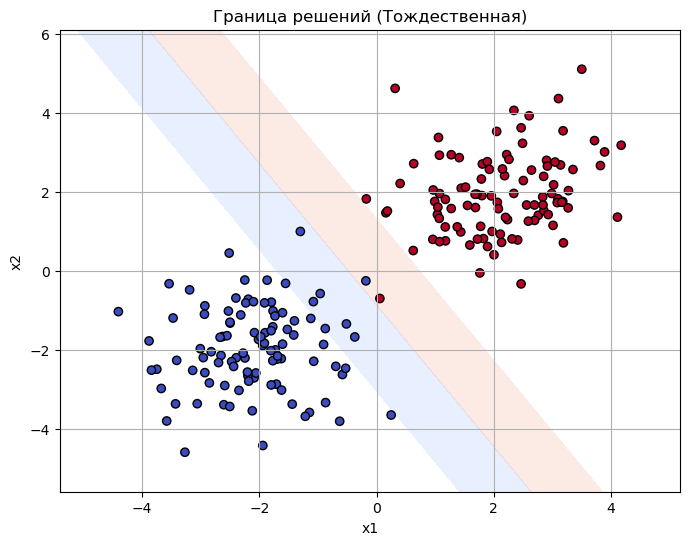


Обучение с функцией активации: Единичная ступенька
Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9900
Эпоха 5/10 — точность: 0.9950
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


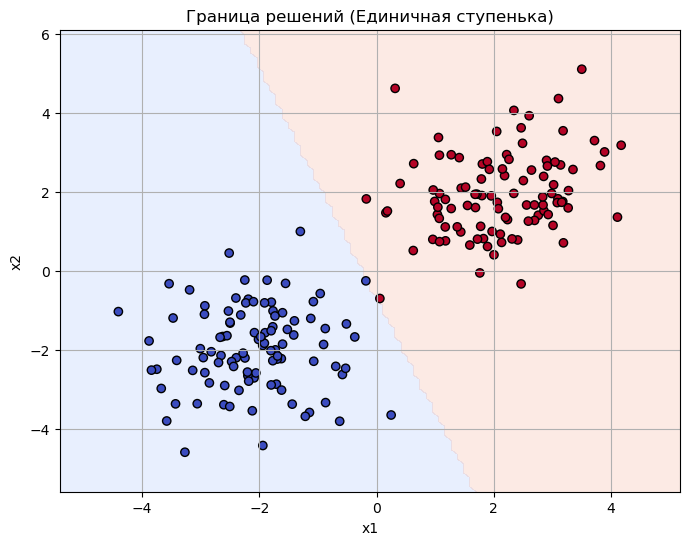


Обучение с функцией активации: Сигмоида
Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9900
Эпоха 4/10 — точность: 0.9950
Эпоха 5/10 — точность: 0.9900
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9950
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


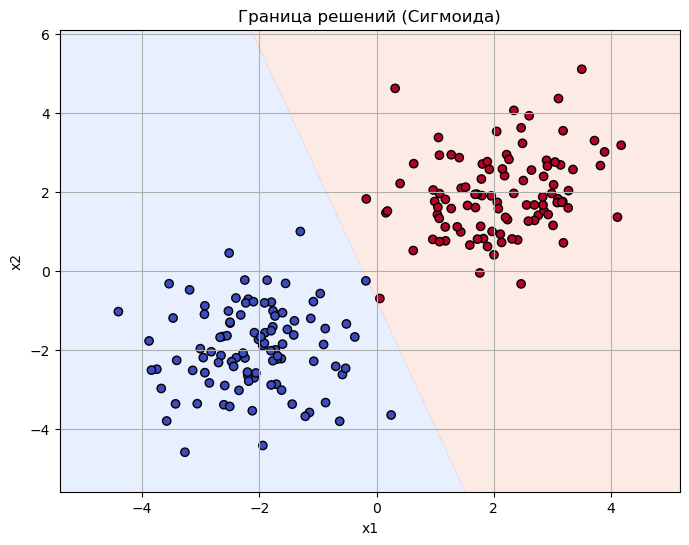


Обучение с функцией активации: Гиперболический тангенс
Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9950
Эпоха 5/10 — точность: 0.9950
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


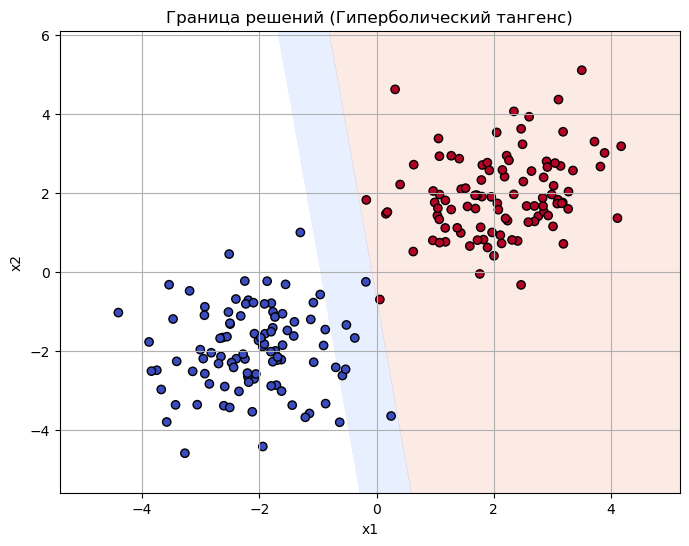


Обучение с функцией активации: Арктангенс
Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9950
Эпоха 5/10 — точность: 0.9950
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9950
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 0.9950
Эпоха 10/10 — точность: 0.9950


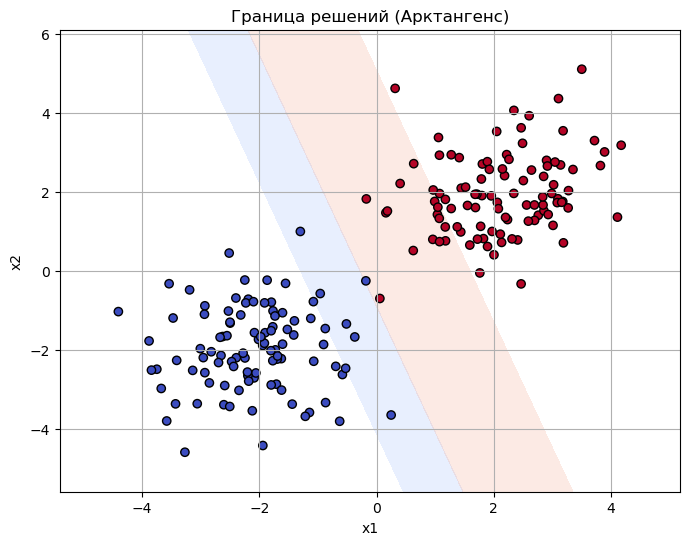

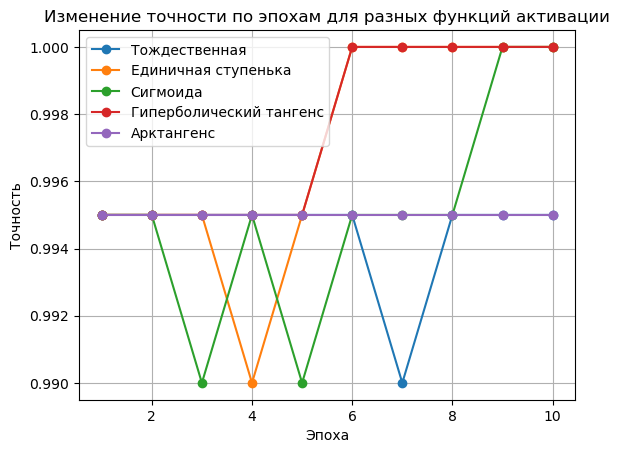

In [7]:

activation_functions = [
    (identity, "Тождественная"),
    (step_function, "Единичная ступенька"),
    (sigmoid, "Сигмоида"),
    (tanh, "Гиперболический тангенс"),
    (arctg, "Арктангенс")
]

results = {}

for func, name in activation_functions:
    print(f"\nОбучение с функцией активации: {name}")
    perceptron = Perceptron(n_inputs=2, activation_func=func)
    losses = perceptron.train(X, y, learning_rate=0.1, epochs=10)
 
    results[name] = {
        'perceptron': perceptron,
        'losses': losses,
        'final_accuracy': 1 - losses[-1]
    }
    

    plot_decision_boundary(perceptron, X, y, f"Граница решений ({name})")


for name, res in results.items():
    plt.plot(range(1, len(res['losses']) + 1), 1 - np.array(res['losses']), marker='o', label=name)

plt.title('Изменение точности по эпохам для разных функций активации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)
plt.show()

1. Что делает функция активации в искусственном нейроне2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?


## Ответы на вопросы
1. Она решает, "включить" нейрон или нет — то есть превращает взвешенную сумму входов в выходное значение. Без неё нейрон просто считал бы линейную комбинацию, и сеть не смогла бы учиться сложным штукам.

2. Искусственный нейрон — это один такой "вычислитель". А однослойный перцептрон — это целый слой таких нейронов, работающих параллельно. Проще говоря: нейрон — кирпичик, перцептрон — стена из таких кирпичиков.

3. Правило коррекции ошибки: если ответ неправильный — подправляем веса в сторону правильного результата. Формула:  
   `w = w + η * (y_true - y_pred) * x`.

4.  Потому что XOR — это нелинейная задача: точки нельзя разделить одной прямой. А перцептрон умеет строить только прямые границы (линейные разделители).

5. В простом перцептроне — почти ничего хорошего. ReLU выдаёт 0 или просто x, и без порога (как у сигмоиды) трудно получить чёткое "0 или 1". В итоге обучение может сломаться или работать хуже, особенно если использовать классическое правило перцептрона.